# **Tech Challenge - Time 7**

**Desafio** Prever o valor dos custos médicos individuais cobrados pelo seguro saúde.

**Target:** preço do seguro saúde


**Integrantes**
* Yuri Fernandes
* Leonardo Ayres
* Camilo
* Douglas de Almeida Costa
* Patrick Pacífico da Silva



# **1. Exploração e pré processamento dos dados**

# **1.1 Carregamento da base de dados**

Buscamos uma base de dados no Kagle com as informações que entendemos que nos ajudar.
Como o Kagle é um repositório público de bases e nossos colegas de classe podem utilizar a mesma base, pedimos para a IA enriquecer a base, tornando-a única para o nosso grupo.

In [854]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Yuriferr/TechChallenge-Fase01/refs/heads/main/base_dados_custos_medicos.csv")


# **1.2 Explorando características**

In [855]:
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,58.0,M,20.80,2.0,NÃO,Noroeste,15595.78
1,56.0,Feminino,30.07,1.0,sim,SE,170044.60
2,27.0,F,24.77,1.0,sim,NO,33858.18
3,23.0,F,30.13,0.0,não,SO,10887.06
4,58.0,Masculino,21.96,3.0,NÃO,NE,26670.40


Conforme acima, a base escolhida contém os seguintes dados:
1. Idade;
2. Gênero;
3. IMC (Índice de Massa Corporea);
4. Quantidade de filhos;
5. Se é fumante;
6. Região onde mora;
7. Encargos do seguro saúde.



In [856]:
df.shape

(1000, 7)

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     980 non-null    float64
 1   gênero    1000 non-null   object 
 2   imc       974 non-null    float64
 3   filhos    994 non-null    float64
 4   fumante   1000 non-null   object 
 5   região    987 non-null    object 
 6   encargos  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


Se trata de uma base com 1000 registros e 7 colunas, onde a metade das colunas têm o formato de texto (object) e a outra metade têm o formato numérico (float64). Precisamos transformar todas as colunas para o formato número, uma vez que os modelos são treinados com dados desse tipo. Mas faremos isso mais para frente.





O dado que será o nosso ***Target*** é a coluna ***encargos***.

As variáveis numéricas são: idade, imc e filhos.

As variáveis categóricas são: gênero, fumante e região.


Iniciamos a observação da correlação hipotética dos dados com o nosso *target* (encargos), ou seja, quais dados podem influenciar no preço do plano.

Nos parece que todas as colunas podem influenciar no resultado:
1. *idade*: Quando o individuo é um bebê ou está na velhice, tende a realizar mais consultas e exames. Logo, pode encarecer o plano;
2. *gênero*: Mulheres tendem a ser mais cuidadosas do que os homens, realizam mais consultas e exames periódicos. Além disso, podem engravidar, necessitando utilizar muito o plano durante esse período. Podemos dizer que as mulheres podem utilizar mais o plano de forma rotineira. Já o homem, por ser menos cuidado, tende a utilizar o plano quando há alguma ocorrência de saúde;
3. *imc*: O IMC pode indicar que um indivíduo é sedentário, tem uma vida ativa ou etc. Essa correlação pode nos dizer que o indivíduo é mais saudável ou não, determinando a frequencia de utilização do plano de saúde;
4. *filhos*: A quantidade de filhos pode indicar dependentes. Todas as hipóteses que discutimos podem ser aplicados aos dependentes. Mesmo não tendo os dados dos dependentes (idade, imc e outros) a quantidade de filhos pode indicar uma maior utilização do plano.
5. *fumante*: Fumar gera sérios problemas para a saúde. Logo, há uma forte relação com o custo do plano.
6. *região*: não sabemos se a região é um grande fator para determinar o preço, mas deve exercer alguma influência. Se o indivíduo viver em uma região menos desenvolvida, por exemplo, pode ter mais problemas de saúde.


Basedo nessa análise hipotética, entendemos que a base pode ser útil para treinar o modelo para chegarmos no nosso *target*.
Passaremos agora a analisar através de estatísticas descritivas e visualizar distribuições relevantes.


# **1.3 Análise estatística descritiva**

# **1.3.1 Análise das variáveis numéricas**

Iniciamos através das análises descritivas das variáveis numéricas.

In [858]:
df.describe()

,idade,imc,filhos,encargos
count,980.000000,974.000000,994.000000,1000.000000
mean,41.435714,28.230349,1.321932,56695.267850
std,13.461516,6.852801,1.135787,45517.418719
min,18.000000,16.290000,0.000000,6797.230000
25%,30.000000,22.995000,0.000000,20565.665000
50%,42.000000,27.760000,1.000000,39494.570000
75%,53.000000,31.987500,2.000000,83627.950000
max,64.000000,52.890000,5.000000,231186.510000


Ao analisar os dados numéricos chegamos as seguintes conclusões:

**idade**
1. A média de idade é de 41 anos. Tendo em vista que o desvio padrão é 13, a idade está bem distribuída na base.
2. A idade mínima e máxima são 18 e 64 anos, respectivamente. Então o modelo não poderá ser aplicado para crianças e adolescentes, uma vez que não temos informação no modelo nesse universo para treinamento, e nem para idosos de muita idade.
3. O valor mínimo da base (18 anos) comparado ao quartil 25% (30) não é muito distante. O valor máximo (64 anos) comparado ao quartil 75% (53) também não é distante. Logo, imaginamos que não há outliers aqui.

**imc**
1. A média do imc é de 28 anos. Tendo em vista que o desvio padrão é 6, o imc está bem distribuído na base.
2. O valor mínimo da base (16) comparado ao quartil 25% (22) não é muito distante.Já o valor máximo (52) comparado ao quartil 75% (31) é quase o dobro. Logo, pode haver outliers com alto valor de imc ou pode indicar que há um pequeno grupo de obesos. Através dos gráficos poderemos entender melhor esse cenário;
3. A maioria dos indivídulos têm o imc até 31 (quartil 75%). Então, talvez seja uma base que representa uma população com imc mais equilibrado.

**filhos**
1. A maiorida dos indivídulos da base têm 1 filho. A média e mediana são muito próximas. Então, não há uma grande variação de filhos nessa população.
2. Temos poucos indivíduos com 5 filhos;
3. Até 75% da base têm 2 filhos;
4. Conforme itens 1, 2 e 3, parece que a distribuição de filhos é coerente com a realidade da população.

**encargos**
1. A média e mediana estão próximas. Logo, não há muita variação de dados. Talvez tenhamos outliers aqui;
2. Valores mínimos e máximos estão bem distantes;
3. O quartil 75% (83627) está bem distante do valor máximo (231186). Mais uma indicação que pode existir outliers.

De forma geral, parece ser uma base equilibrada. Talvez a preocupação sejam com outliers relacionados aos encargos. Vamos visualizar os dados através de gráficos para aprofundar na análise.

# **1.3.2 Análise das variáveis categóricas**

Vamos identificar as variações existentes em cada variável.

In [859]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

gênero: ['M' 'Feminino' 'F' 'Masculino' 'f' 'masculino' 'feminino' 'm']
fumante: ['NÃO' 'sim' 'não' 'N' 'SIM' 's' 'Não' 'Sim' 'n' 'S']
região: ['Noroeste' 'SE' 'NO' 'SO' 'NE' 'Sudoeste' 'Centro' 'noroeste' 'nordeste'
 'centro' 'Sudeste' 'sudeste' nan 'sudoeste' 'Nordeste' 'C']


Há muitas variações. Precisaremos padronizá-las.

Iniciaremos com a análise da variável *gênero*.

Primeiro vamos identificar as variações de valores e padronizá-los como *masculino* e *feminino*.

In [860]:
#Padronizar valores da coluna gênero
#Todos os valores: ['M' 'm' 'F' 'feminino' 'masculino' 'Masculino' 'Feminino' 'f']
df['gênero'] = df['gênero'].replace(['M', 'm', 'F', 'feminino', 'masculino', 'Masculino', 'Feminino', 'f'], ['masculino', 'masculino', 'feminino', 'feminino', 'masculino', 'masculino', 'feminino', 'feminino'])

print(df['gênero'].unique())

['masculino' 'feminino']


Agora a variável *fumante*. Vamos padronizá-los entre *sim* e *não*.

In [861]:
#Padronizar valores da coluna fumante
#Todos os valores: ['s' 'N' 'Sim' 'NÃO' 'Não' 'SIM' 'S' 'não' 'sim' 'n']
df['fumante'] = df['fumante'].replace(['s', 'N', 'Sim', 'NÃO', 'Não', 'SIM', 'S', 'não', 'sim', 'n'], ['sim', 'não', 'sim', 'não', 'não', 'sim', 'sim', 'não', 'sim', 'não'])

print(df['fumante'].unique())

['não' 'sim']


A variável *região* ficará padronizada em *noroeste*, *sudeste*, *nordeste*, *sudoeste* e *centro*.

In [862]:
#Padronizar valores da coluna região
#Todos os valores: ['nordeste' 'centro' 'noroeste' 'Sudeste' 'C' 'sudeste' 'SO' 'SE' 'Nordeste' 'Noroeste' 'sudoeste' 'NO' 'Sudoeste' 'NE' 'Centro']
df['região'] = df['região'].replace(['nordeste', 'centro', 'noroeste', 'Sudeste', 'C', 'sudeste', 'SO', 'SE', 'Nordeste', 'Noroeste', 'sudoeste', 'NO', 'Sudoeste', 'NE', 'Centro'],
 ['nordeste', 'centro', 'noroeste', 'sudeste', 'centro', 'sudeste', 'sudeste', 'sudeste', 'nordeste', 'noroeste', 'sudoeste', 'noroeste', 'sudoeste', 'nordeste', 'centro'])

print(df['região'].unique())

['noroeste' 'sudeste' 'nordeste' 'sudoeste' 'centro' nan]


# **1.3.3 Análise e tratamento de valores nulos**

Vamos identificar quais são as variáveis que estão com valores nulos.

In [863]:
print(df.isnull().sum())

idade       20
gênero       0
imc         26
filhos       6
fumante      0
região      13
encargos     0
dtype: int64


As variáveis idade, imc, filhos e região contém valores nulos.
Não há nada intuitivo para definir um valor padrão para as colunas nulas de idade, imc e região. Então, optaremos em excluir essas colunas.

Há apenas 6 registros com a coluna de filhos nula. Decidimos que vamos considerar esses indivídulos como "sem filhos". Como são poucos, achamos que é melhor do que excluir todo o regsitro. Faremos isso a seguir.

In [864]:
#Valores nulos da coluna filhos deve se tornar 0
df['filhos'].fillna(0, inplace=True)

<ipython-input-864-527809e8efbd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['filhos'].fillna(0, inplace=True)


In [865]:
print(df['filhos'].isnull().sum())

0


Agora vamos excluir os registros nulos que restaram.

Revisando valores nulos restantes (note que não há mais registros nulos para filhos).

In [866]:
print(df.isnull().sum())

idade       20
gênero       0
imc         26
filhos       0
fumante      0
região      13
encargos     0
dtype: int64


Executando a exclusão dos registros com valores nulos.

In [867]:
#Remover valores nulos
df = df.dropna()

Conferindo o resultado.

In [868]:
print(df.isnull().sum())

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64


# **1.4 Visualização de distribuições e correlações relevantes**

Com as variáveis categóricas normalizadas, vamos analisar as distribuições.



# **1.4.1 Analisando a distribuição das variáveis categóricas**

**Gênero**

In [869]:
df['gênero'].value_counts()

,count
gênero,
feminino,478
masculino,467


In [870]:
df['gênero'].value_counts(normalize=True)

,proportion
gênero,
feminino,0.50582
masculino,0.49418


Há uma distribuição equilibrada em gênero. Aproximadamente 50% para mulheres (51%, exatamente) e 50% para homens (48%, exatamente).

**Fumante**

In [871]:
df['fumante'].value_counts()

,count
fumante,
sim,478
não,467


In [872]:
df['fumante'].value_counts(normalize=True)

,proportion
fumante,
sim,0.50582
não,0.49418


Há uma distribuição ainda mais equilibrada em fumante. Aproximadamente 50,4% para fumantes e 49,6% para não fumantes.

**Região**

In [873]:
df['região'].value_counts()

,count
região,
sudeste,231
nordeste,215
centro,197
noroeste,186
sudoeste,116


In [874]:
df['região'].value_counts(normalize=True)

,proportion
região,
sudeste,0.244444
nordeste,0.227513
centro,0.208466
noroeste,0.196825
sudoeste,0.122751


1. A maioria dos indivíduos estão na região sudeste.
2. A menor população está na região sudoeste.
3. De forma geral não há uma grande variação entre a quantidade de indivíduos entre as regiões;

In [875]:
#df.corr()
#📌 4. Correlação entre variáveis numéricas
#Use df.corr() (ou sns.heatmap(df.corr())) para:

#Ver se há correlação entre charges e outras variáveis (como age, bmi, children)
#Avaliar multicolinearidade (variáveis muito correlacionadas entre si, que podem atrapalhar a regressão)

# **1.4.2 Analisando a distribuição das variáveis numéricas**

Após o tratamento iniciais dos dados, vamos analisar a distribuíção das variáveis numéricas.

Já realizamos a análise descritiva no item 1.3.1 e agora faremos análises visuais através de gráficos.

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

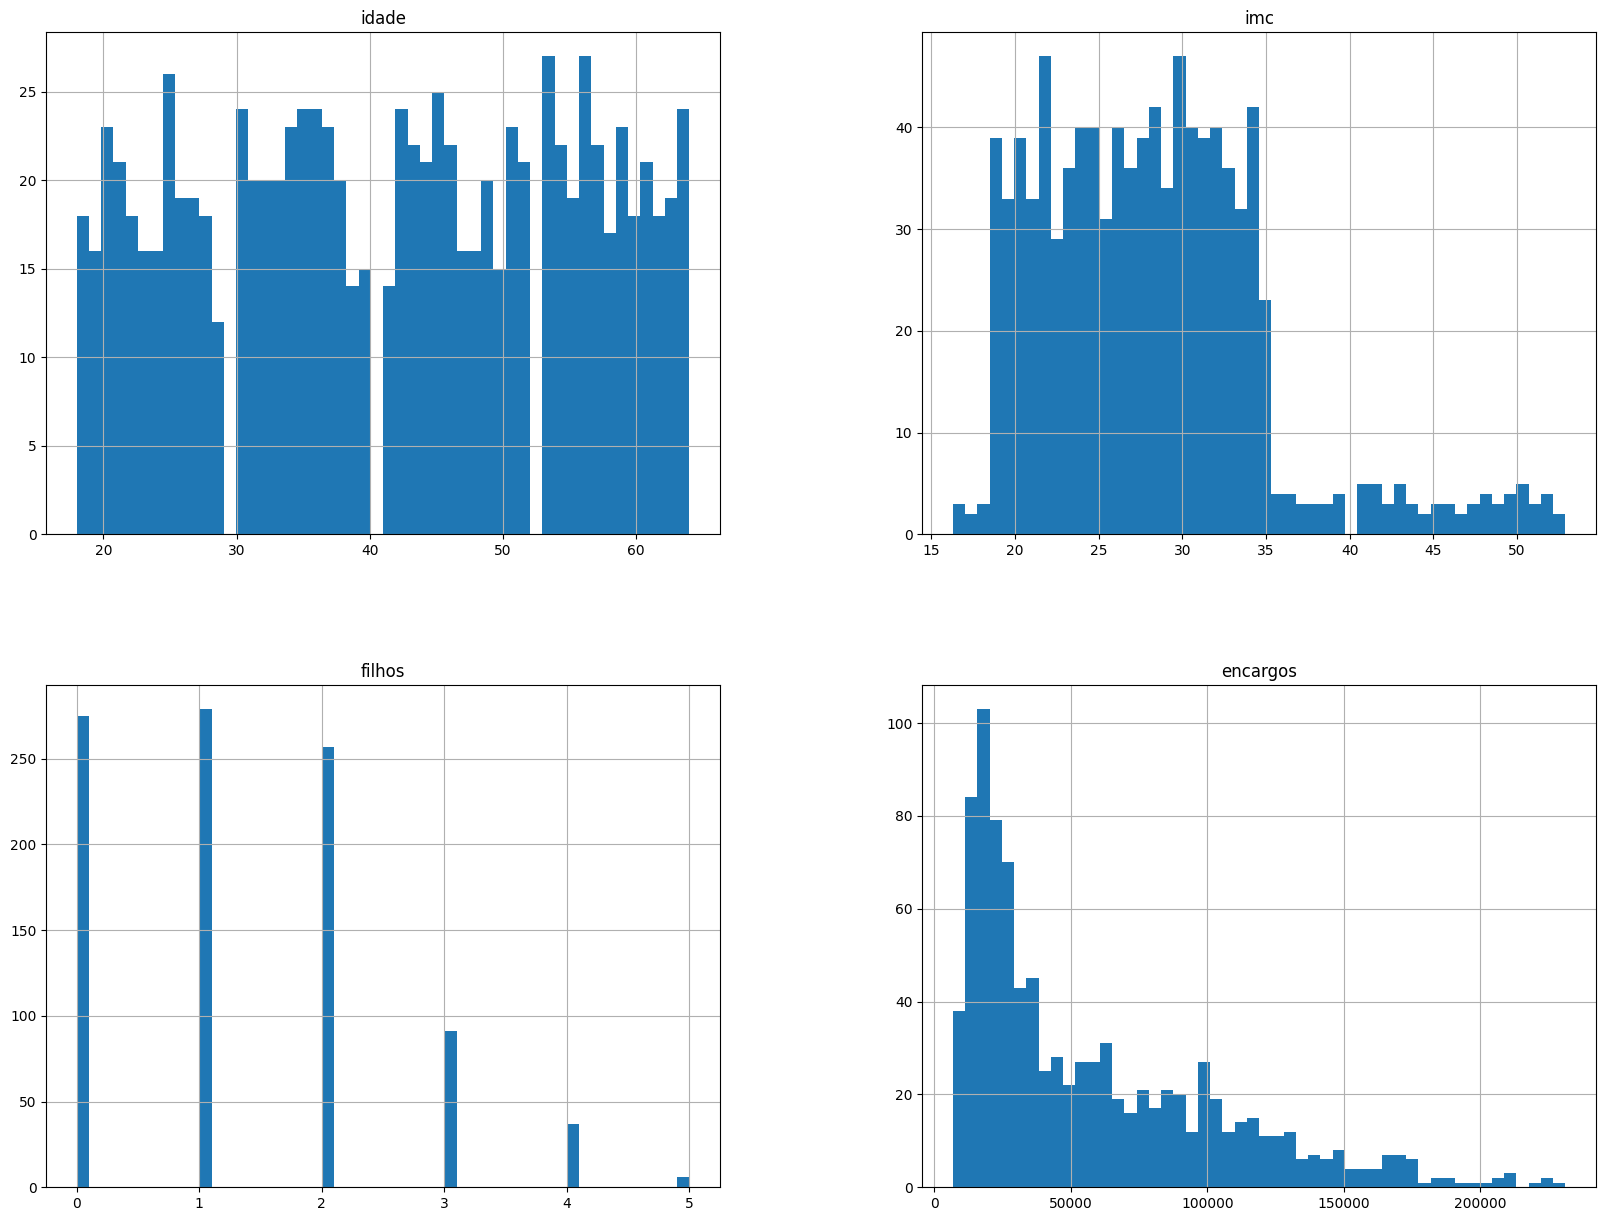

In [876]:
df.hist(bins=50, figsize=(20,15))

**Observações**

**idade**
1. Realmente há uma boa distribuição de idade na base;
2. Há um vazio "buraco" de amostra das idades apriximadas de 29, 41 e 53, observando através dos espaços em branco no gráfico aparentemente nessas idades;
3. Realmente não há outliers em idade. Os valores estão concetnrados entre 18 e 64 anos. Não há necessidade de um tratamento nesse sentido aqui.

**imc**
1. A grande parte do IMC está concentração nos valores 19 e 35;
2. Há uma quantidade menor de indivídulos com o IMC entre 35 e 52;
3. Baseados no item 1 e 2, se trata de uma base que a maioria da população não é obesa. Parece representar a realidade.
2. Através do gráfico não parece existir outiliers, mas sim, representar um pequeno grupo de obesos. Na análise que fizemos através do *df.describe()* anteriormente ficamos com essa dúvida.

**filhos**
1. A maiorida dos indivídulos da base têm 1 filho. Comprovamos através do gráfico que não há uma grande variação de filhos nessa população;
3. Grande parte da base está concentrada em até 2 filhos;
4. Não há outliers.

**encargos**
1. A maior parte do valor dos encargos estão concentrados mais a esqueda do gráfico;
2. A quantidade de planos caros é baixa, mas observamos um pequena concentração a direita. Não parece ser outliers.

Realmente parece ser uma base equilibrada. Vamos gerar mais gráficos para nos aprofundar ainda na análise.

# **1.4.3 Correlação entre as variáveis**

Imaginamos que algumas variáveis incluenciam no valor do encargo e queremos observar se a base tem essa presentatividade. As influêcias são:
1. A idade do indivíduo influencia no valor do encargo, sendo mais alto para aqueles que fumam;
2. O IMC do indivíduo influencia no valor do encargo, sendo mais alto para aqueles que fumam.
3. O encargo é mais alto para mulheres como descrvemos no item 1.2?
4. O encargo deve ser mais alto para fumantes;
5. Qual a influência da região no valor dos encargos?
6. A quantidade de filhos realmente impacta no valor do encargo?
7. Como acreditamos que o fato de ser fumante é de grande influência no encargo, será que a base está equilibrada com essa característica?

# **1.4.3.1 Idade vs Fumante vs Encargos**

Vamos analisar a agora a influência da idade e fumantes no valor dos encargos.




Text(0, 0.5, 'Encargos')

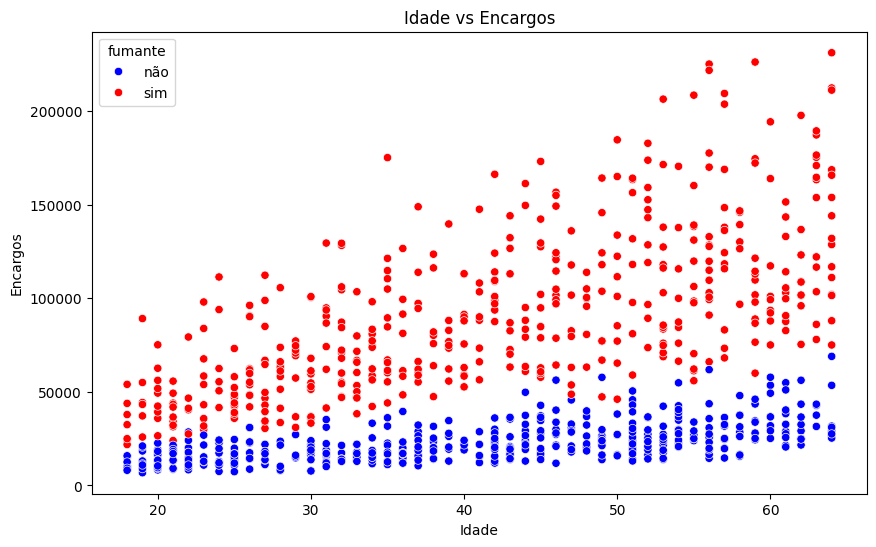

In [877]:
#grafico idade, valor e fumante
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade', y='encargos', hue='fumante', palette={'sim': 'red', 'não': 'blue'})
#sns.scatterplot(data=df, x='idade', y='encargos')
plt.title('Idade vs Encargos')
plt.xlabel('Idade')
plt.ylabel('Encargos')

**Observações**
1. De forma geral, podemos observar que há uma crescente no valor dos encargos para indivíduos mais velhos. Ou seja, é mais barato aos mais novos e mais caro aos mais velhos;
2. Há uma grande diferença no valor quando o indivíduo é fumante. O valor do encargo é maior para quem fuma;
3. Existem encargos altíssimos para indivídulos mais velhos e fumantes.

Conluímos que sim, a base representa que a idade do indivíduo influencia no valor do encargo, sendo mais alto para aqueles que fumam.

# **1.4.3.2 Correlação das variáveis numéricas**

Vamos analisar correlação das variáveis numéricas atuais.

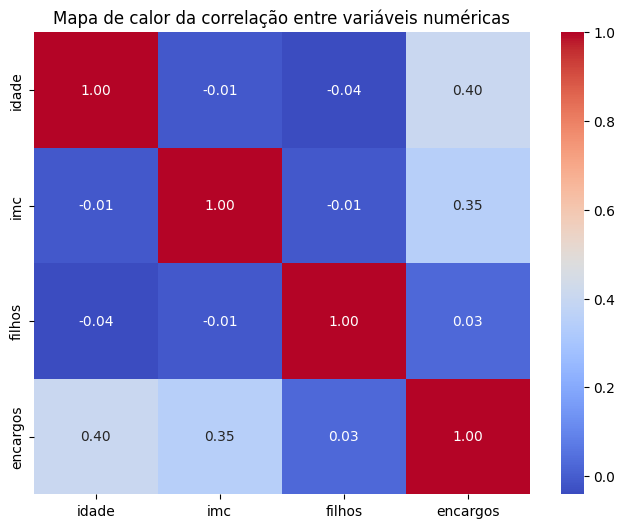

In [878]:
# Calcular a matriz de correlação apenas para colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da correlação entre variáveis numéricas')
plt.show()

**Observações**
1. A quantidade de filhos não muita relevância no valor de encargo;
2. O IMC tem relevância equilibrada no valor de encargo;
2. A idade tem relevância equilibrada no valor de encargo. É ligeiramente maior do que o IMC.

Conluímos que a idade e IMC são relevantes para se considerar no valor do seguro saúde.

# **1.4.3.2 IMC vs Fumante vs Encargos**

Vamos analisar a agora a influência do IMC e fumantes no valor dos encargos.


Text(0, 0.5, 'Encargos')

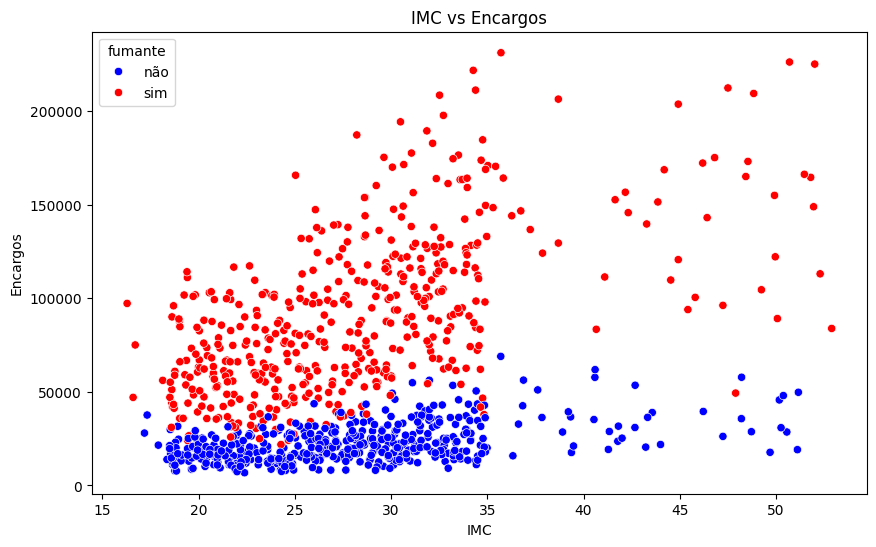

In [879]:
#Grafico de dispersao entre imc vs encargos e fumantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imc', y='encargos', hue='fumante', palette={'sim': 'red', 'não': 'blue'})
plt.title('IMC vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos')

**Observações**
1. Indivíduos com IMC mais baixo pagam menores encargos. Mas não é uma diferença tão significativa;
2. Há indivíduos com IMC mais baixo, próximo de 30, com valores mais altos de encargos do que indivídulos com IMC mais alto;
3. Ser fumante impacta significativamente no valor dos encargos. Somado ao IMC alto, o valor fica ainda maior;
4. Não identificamos outliers na base. Não realizaremos esse tratamento.

Conluímos que o IMC não tem uma influência significativa no valor dos encargos. Há diferença, mas não tão grande. O maior fator do encarecimento é o fato de ser fumante.

# **1.4.3.3 Correção de gênero, fumante, região e filhos com os encargos**

<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], 

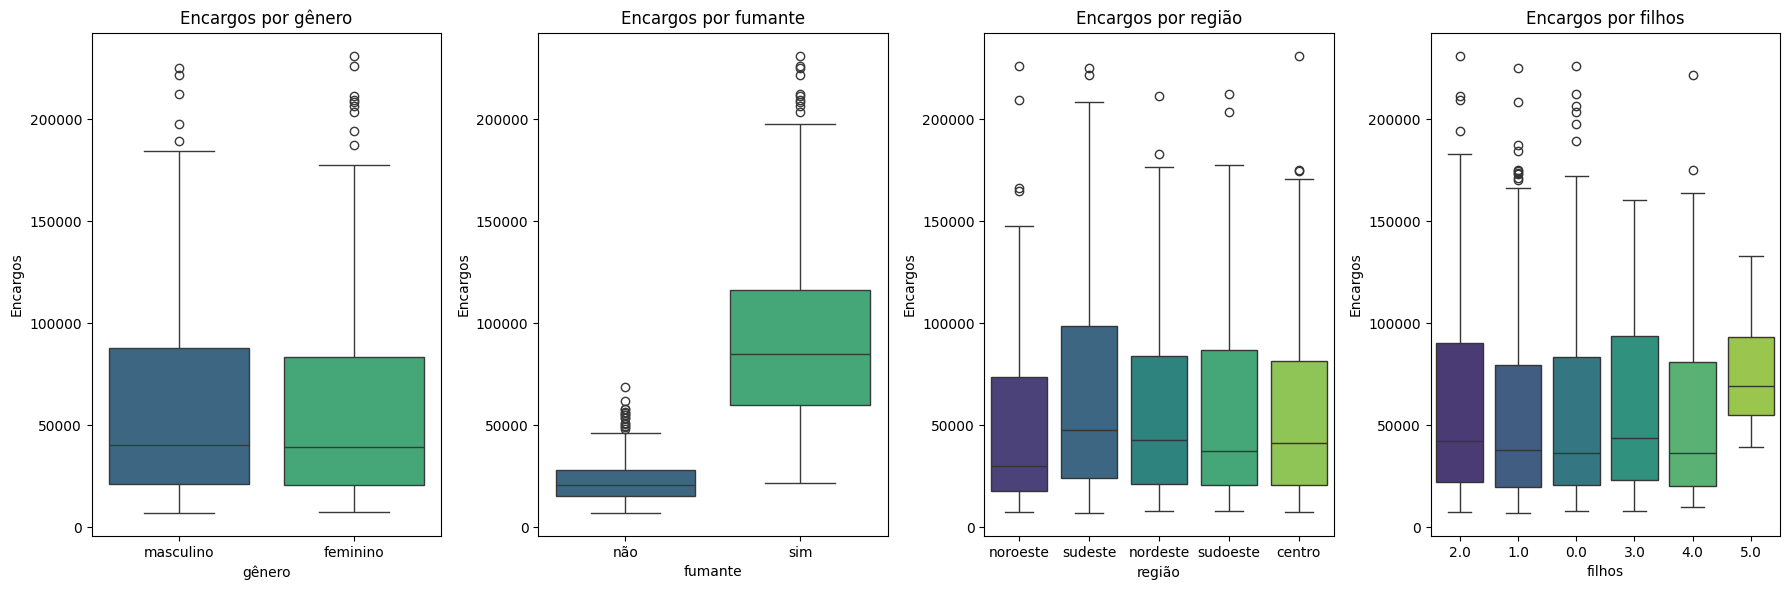

In [880]:
# Box Plots para 'encargos' vs. variáveis categóricas
categorical_cols = ['gênero', 'fumante', 'região', 'filhos'] # filhos pode ser tratado como categórica para box plot
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
    plt.title(f'Encargos por {col}')
    plt.xlabel(col)
    plt.ylabel('Encargos')
plt.tight_layout()
plt.show()

**Observações**
1. Não há diferença nos encargos quando comparamos homem e mulher. Logo, o gênero não exerce influência no valor como um hipósete que tínhamos;
2. Inegavelmente ser fumante encarece o valor do plano;
2. Há diferença no valor do encargo baseada na região onde o indivíduo mora, mas não é algo tão relevante. Entretanto, não parece ser um problema para o treinamento do modelo.
4. Moradores do Sudeste em encargos mais altos;
5. O Encargo é mais alto para quem tem 5 filhos. Entretant, não parece haver uma relação forte com o valor, uma vez que de 0 até 4 filhos o custo é bem equilibrado;
6. Em todos os gráficos notamos valores elevados de encargos que estão distantes da concentração das demais variáveis. Então, entendemos que é importante remover esses outliers para termos um melhor resultado no treinamento do modelo.

Conluímos que a hipótese do valor do encargo ser mais alto para mulheres por serem mais cuidadosas e fazem mais exames, além da possibilidade de gravidez, não se reflete na base. Entretanto, não vemos isso como um problema para o treinamento do medelo, foi apenas uma hipotése que não se sustentou.
A fato de ser fumante é a maior influência no valor do encargo, o que é muito coerente.
A região e quantidade de filhos parecem ter uma representatividade interessante, não fugindo da realidade.
Além disso, há outliers de encargos para todos os cenários analisados. É importante removê-los para melhorar o resultado do treinamento do modelo.
Por essas perspectivas, a base parece ser boa para o treinamento do modelo.

# **1.4.3.4 Representatividade de fumantes por gênero na base**

Vamos avaliar agora se a base está bem equilibrada com relação aos fumantes divididos entre homens e mulheres.

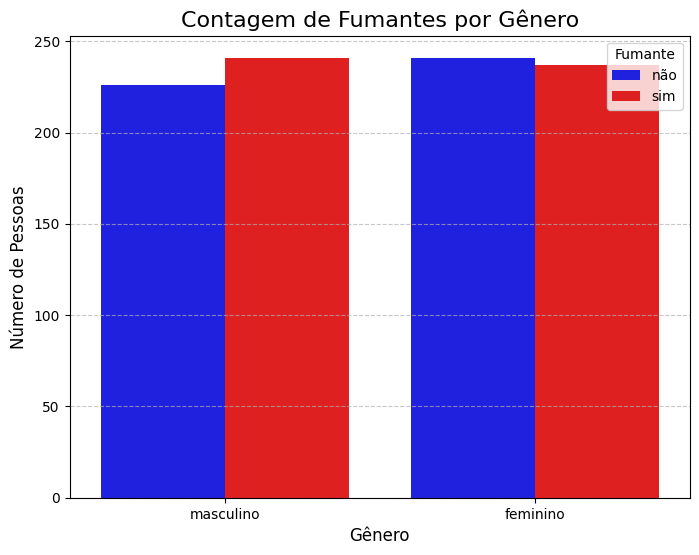

In [881]:
#grafico de comparacao genero, fumante
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gênero', hue='fumante', palette={'sim': 'red', 'não': 'blue'})

plt.title('Contagem de Fumantes por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.legend(title='Fumante')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observações**
1. A quantidade de homens fumantes e não fumantes está bem equilibrada;
2. Há um pouco mais de homens fumantes do que não fumantes sendo representados na base;
3. A quantidade de mulheres fumantes e não fumantes está bem equilibrada;
2. Há um pouco mais de mulheres não fumantes do que fumantes sendo representados na base;

Concluímos que a representação na base entre fumantes e não fumantes divididos entre homens e mulheres está adequada.

# 3. Modelagem

Iniciaremos agora a modelagem dos dados preparando-os para o treinamento da base.

Iremos remover os outliers da variável encargos. A função *clean_outliers* remove valores extremos de uma coluna numérica usando o método do intervalo interquartil (IQR), mantendo apenas os dados dentro de 1,5 (A constante 1,5 é um fator amplamente usado para identificar outliers moderados) vezes a distância entre o 1º e o 3º quartil.

In [882]:
#Funcao para limpar outlies
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#encargos
df = clean_outliers(df, 'encargos')

Precisamos transformar as variáveis categóricas em numéricas, uma vez que os modelos só trabalham com números.

In [883]:
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,58.0,masculino,20.80,2.0,não,noroeste,15595.78
1,56.0,feminino,30.07,1.0,sim,sudeste,170044.60
2,27.0,feminino,24.77,1.0,sim,noroeste,33858.18
3,23.0,feminino,30.13,0.0,não,sudeste,10887.06
4,58.0,masculino,21.96,3.0,não,nordeste,26670.40


In [884]:
from sklearn.preprocessing import LabelEncoder

colunas_categoricas = ['gênero', 'fumante', 'região']

label_encoder = LabelEncoder()

for coluna in colunas_categoricas:
    df[coluna] = label_encoder.fit_transform(df[coluna])

df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,58.0,1,20.80,2.0,0,2,15595.78
1,56.0,0,30.07,1.0,1,3,170044.60
2,27.0,0,24.77,1.0,1,2,33858.18
3,23.0,0,30.13,0.0,0,3,10887.06
4,58.0,1,21.96,3.0,0,1,26670.40


Agora que todas as variáveis são numéricas, analisaremos a correlação que há entre todas elas.

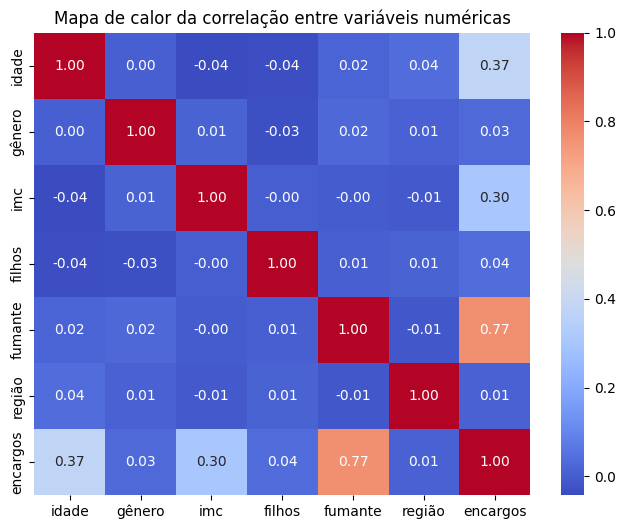

In [885]:
# Calcular a matriz de correlação apenas para colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da correlação entre variáveis numéricas')
plt.show()

**Observações**
1. A região tem relação quase nula com o valor do encargo;
2. Ser fumante é determinante para o valor do encargo;
3. Como já analisado anteriormente idade e IMC tem relevância parecida no valor de encargo;
4. Filhos e genêro tem pouca relação com o valor de encargos.





Concluímos que as variávies que mais impactam no valor do encargo é fumante, imc e idade, sendo fumante a mais importante de todas.
Sendo assim, entendemos que a base representa um universo real, sendo coerente para utilizarmos no treinamento do nosso modelo para prever o valor do encargo.

Agora com todas as variáveis sendo representadas através de números, vamos iniciar a configuração para o treinamento do modelo.

# 4. Treinamento e avaliação do modelo

Prever os custos médicos individuais cobrados pelo seguro saúde (variável encargos) com base em características dos indivíduos.

Configuramos os encargos como o nosso *target* colocando-o no eixo y e as demais variáveis no eixo x.

In [886]:
#Confiurar x e y
x = df.drop(['encargos'], axis=1)
y = df['encargos']

Separamos a base em 20% de teste e 80% treino.

In [887]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [888]:
print(len(x_train), "treinamento +", len(x_test), "teste")

744 treinamento + 186 teste


Treinamos o modelo.

In [889]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Comparativo com outros algoritmos

In [890]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),  #0.8158547747792559
    'KNN': KNeighborsRegressor(n_neighbors=22), #0.7837624203797654
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost' : xgb.XGBRegressor(
      objective='reg:squarederror',  # objetivo para regressão
      n_estimators=100,              # número de árvores
      learning_rate=0.1,             # taxa de aprendizado
      max_depth=3,                   # profundidade máxima das árvores
      random_state=42)
    #0.7986960141141736

}

results = {}
for name, model in models.items():
    model.fit(x_train_escalonado, y_train)
    y_pred = model.predict(x_test_escalonado)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
for name in sorted(results, key=lambda x: results[x]["R2"], reverse=True):
    print(f'{name}:')
    print(f'MAE: {results[name]["MAE"]}')
    print(f'MSE: {results[name]["MSE"]}')
    print(f'R2: {results[name]["R2"]}')
    print('\n')

XGBoost:
MAE: 10175.279369119622
MSE: 237455065.63142425
R2: 0.8884586132016142


Gradient Boosting:
MAE: 10295.081569337728
MSE: 240081386.935407
R2: 0.887224933390887


Random Forest:
MAE: 10862.643952688171
MSE: 253101834.1980911
R2: 0.8811087499329637


KNN:
MAE: 12735.718032746821
MSE: 350400539.0528287
R2: 0.835403965980155


Linear Regression:
MAE: 14920.266166947617
MSE: 418709015.4256178
R2: 0.803316959689322


Lasso:
MAE: 14919.958160343751
MSE: 418721527.6129979
R2: 0.8033110822542437


Ridge:
MAE: 14914.762510648428
MSE: 419103858.97970706
R2: 0.8031314871348646




Realizamos os testes através de 7 modelos para identificar qual terá o melhor resultado, sendo o mais indicado para prever o custo do seguro saúde. São eles:
1. XGBoost;
2. Gradient Boosting;
3. Random Forest;
4. KNN;
5. Linear Regression;
6. Lasso;
7. Ridge.

Observamos que os melhores resultados são dos modelos baseados em árvore - XGBoost, Gradient Boosting e Random Forest, pois apresentaram menores erros e maiores pontuações R2. Isso significa que, para esse conjunto de dados, são as melhores opções para gerar previsões mais confiáveis. O XGBoost foi o melhor deles, minimamente melhor que o Gradient Boosting.

# 5. Validação estatística

Criamos dois gráficos com os objetivos:
1. Comparar os modelos pelos valores de erro MAE e MSE. Aqui, quanto
menor o erro, mais preciso é o modelo;
2. Mostrar a pontuação R2, que indica o quanto o modelo consegue prever corretamente a variabilidade dos dados;
3. Verificar qual modelo faz previsões mais próximas da realidade.

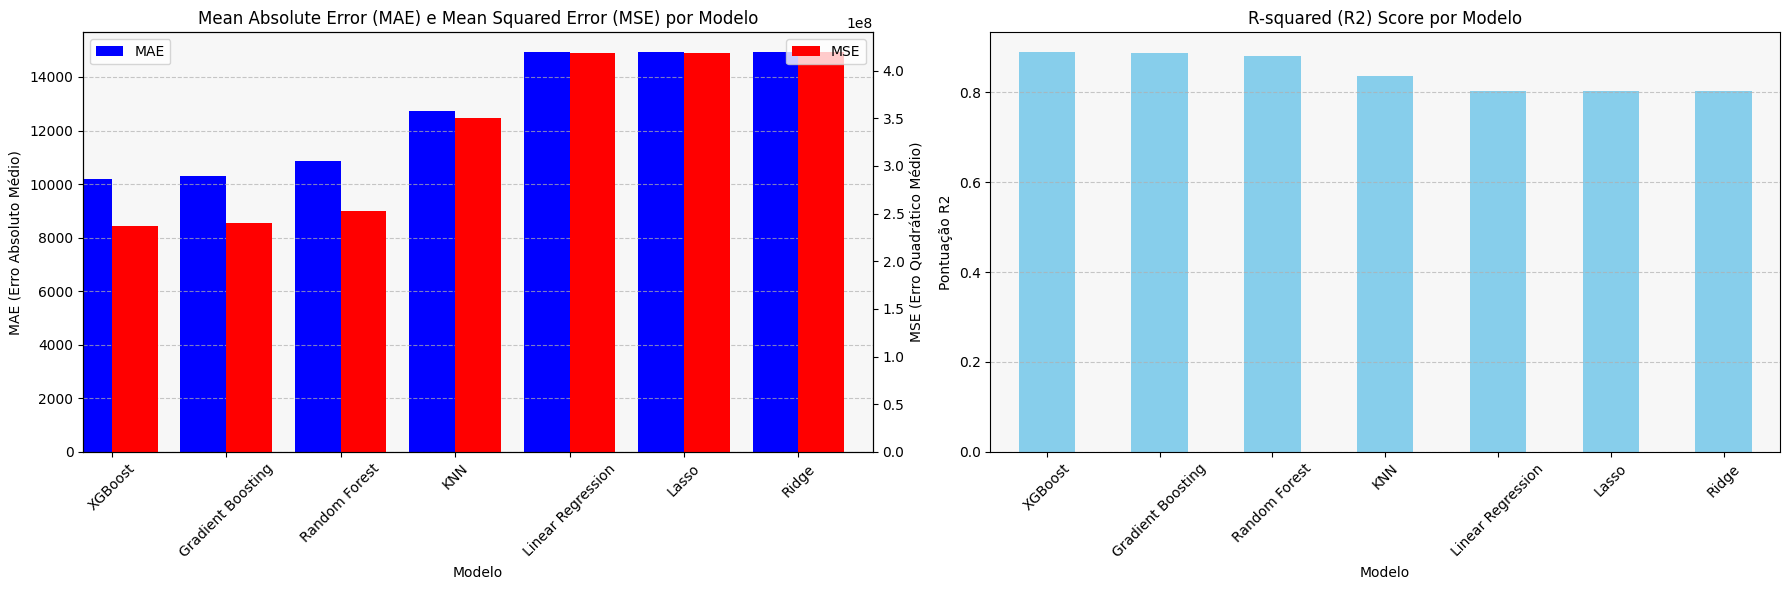

In [891]:
# Convertendo os resultados para um DataFrame para facilitar a plotagem
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='R2', ascending=False)

# Criando a figura com dois subplots para MAE/MSE e R2
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando MAE e MSE
# Criando um segundo eixo Y para ajustar as escalas do MAE e MSE
ax2 = axes[0].twinx()

# Plotando MAE no eixo primário
df_results['MAE'].plot(kind='bar', ax=axes[0], color='blue', position=1, width=0.4)
axes[0].set_ylabel("MAE (Erro Absoluto Médio)")
axes[0].set_xlabel("Modelo")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotando MSE no segundo eixo Y
df_results['MSE'].plot(kind='bar', ax=ax2, color='red', position=0, width=0.4)
ax2.set_ylabel("MSE (Erro Quadrático Médio)")

# Ajustando título e legendas
axes[0].set_title('Mean Absolute Error (MAE) e Mean Squared Error (MSE) por Modelo')
axes[0].legend(["MAE"], loc="upper left")
ax2.legend(["MSE"], loc="upper right")

# Ajuste do fundo
axes[0].set_facecolor('#f7f7f7')
ax2.set_facecolor('#f7f7f7')

# Plotando R2 Score
df_results['R2'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('R-squared (R2) Score por Modelo')
axes[1].set_ylabel('Pontuação R2')
axes[1].set_xlabel('Modelo')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_facecolor('#f7f7f7') # Cor de fundo leve

# Ajustando layout e exibindo os gráficos
plt.tight_layout()
plt.show()

Realizaremos a avaliação dos diferentes modelos de aprendizado de máquina, calculando métricas de erro e exibindo gráficos de dispersão para visualizar o desempenho dos modelos.

A linha vermelha representa a realidade e as bolas azuis as previsões.

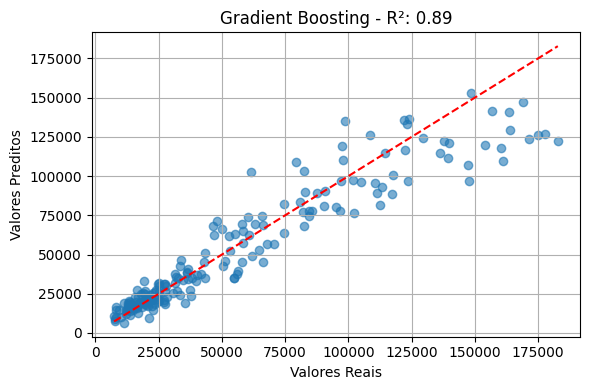

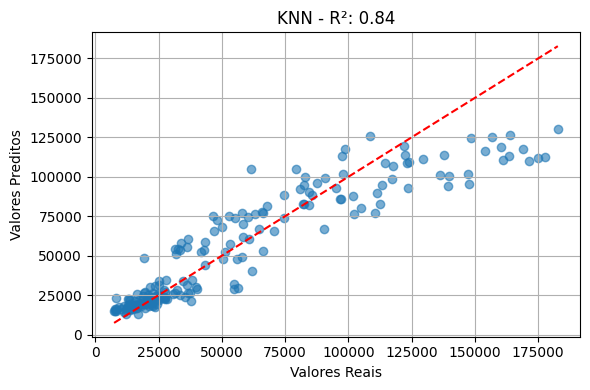

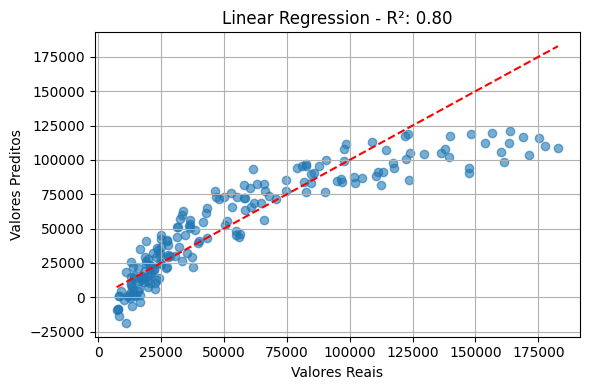

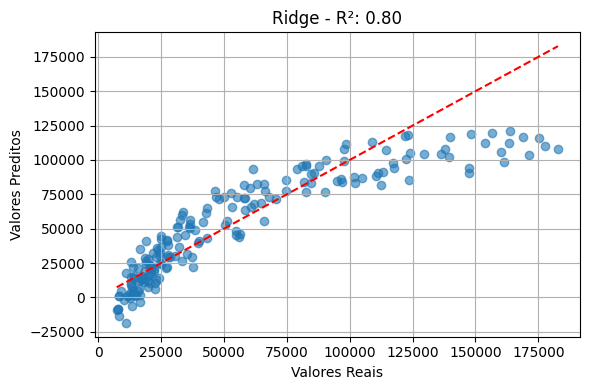

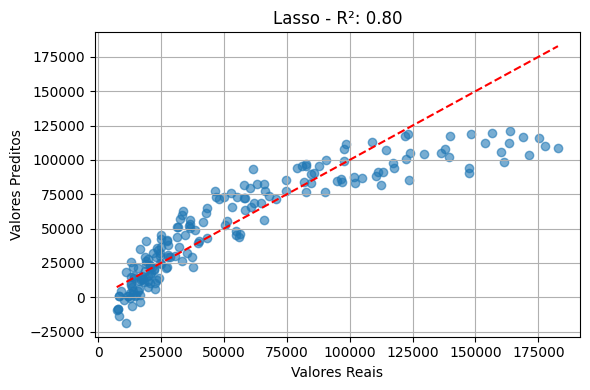

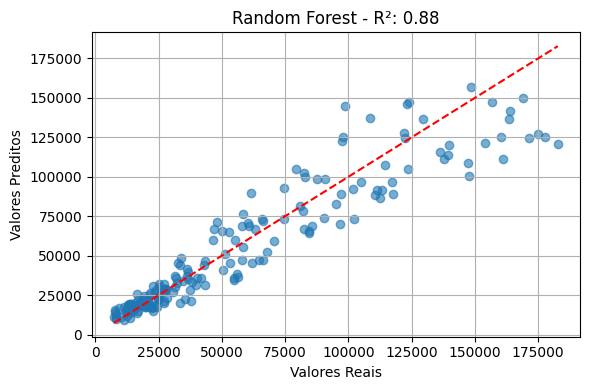

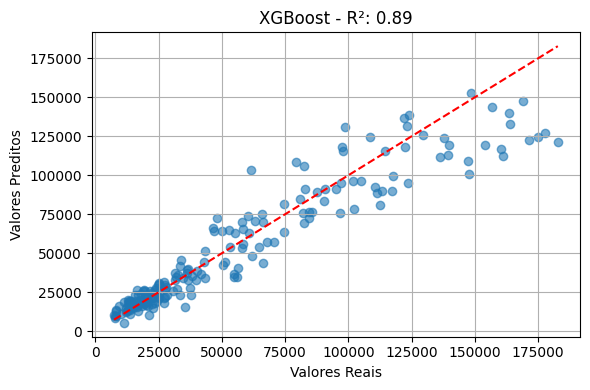

In [892]:
for name, model in models.items():
    model.fit(x_train_escalonado, y_train)
    y_pred = model.predict(x_test_escalonado)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

    # Gráfico de Dispersão
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(f'{name} - R²: {results[name]["R2"]:.2f}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observações**
1. Para todos os modelos, conforme o valor de encargo é mais alto a acurácia começa a cair;
2. O Lasso foi bem até os valores medianos dos encargos, começando a cair consideralvelmente depois, iniciando uma curva para baixo;
3. O Ridge foi parecido com o Lasso, descrito no item 2;
4. Linear Regression começou a cair próximo do 4/4 dos encargos, assim com o KNN, também iniciando uma curva para baixo;
5. Os melhores modelos, XGBoost, Gradient Boosting e Random Forest, se mantiveram próximos da previsão real durente todo o gráfico. Apresentaram um pequeno descolamento nos valores mais altos, mas não geram a curvas significativas para baixo ou para cima.

**Distribuição dos Erros Residuais**





Aqui verificamos se o modelo está cometendo muitos erros grandes ou se os erros estão centrados em torno de zero (bom sinal).

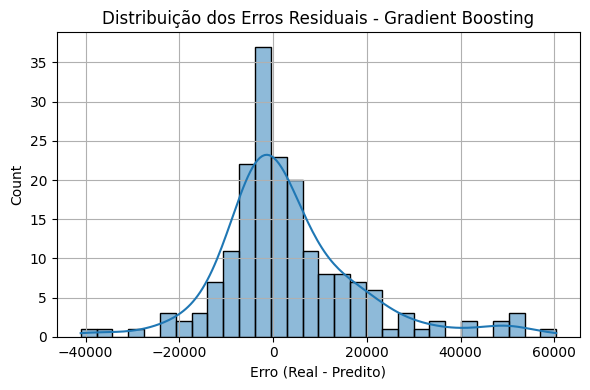

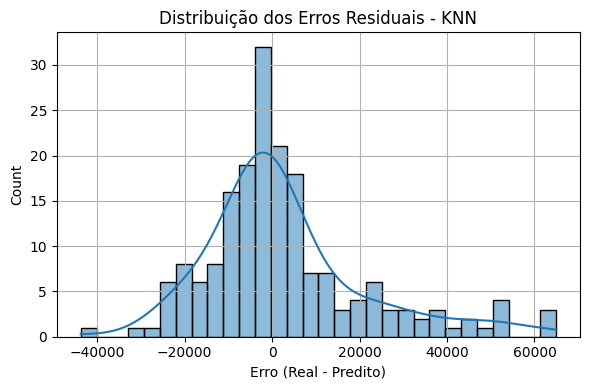

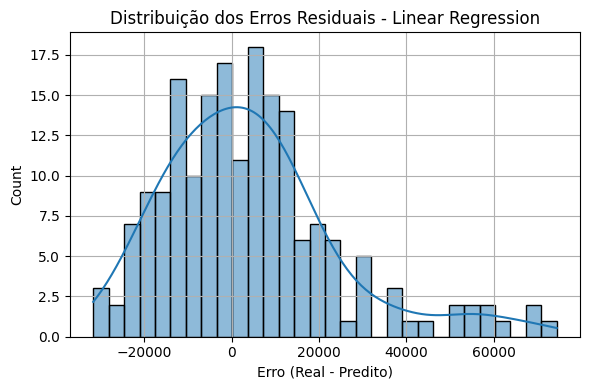

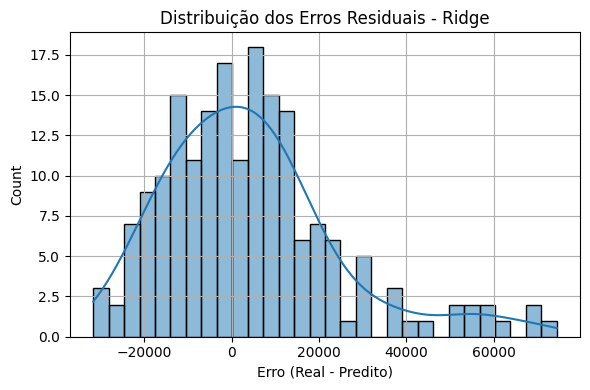

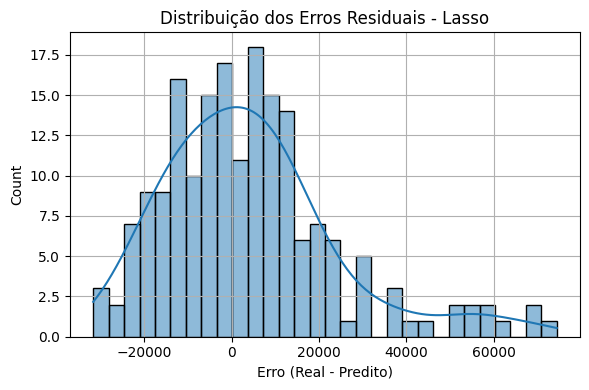

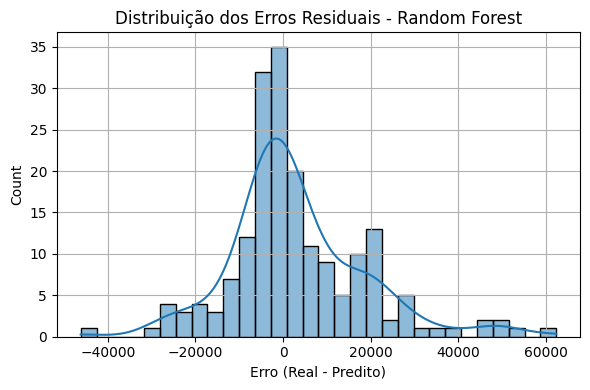

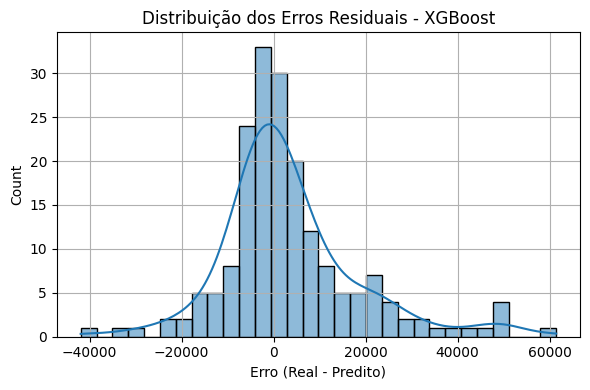

In [893]:
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(x_test_escalonado)
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Distribuição dos Erros Residuais - {name}')
    plt.xlabel('Erro (Real - Predito)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Boxplot dos Erros Residuais por Modelo**

Comparativo visual dos erros residuais entre os modelos. Quando mais agrupados, melhor o modelo.

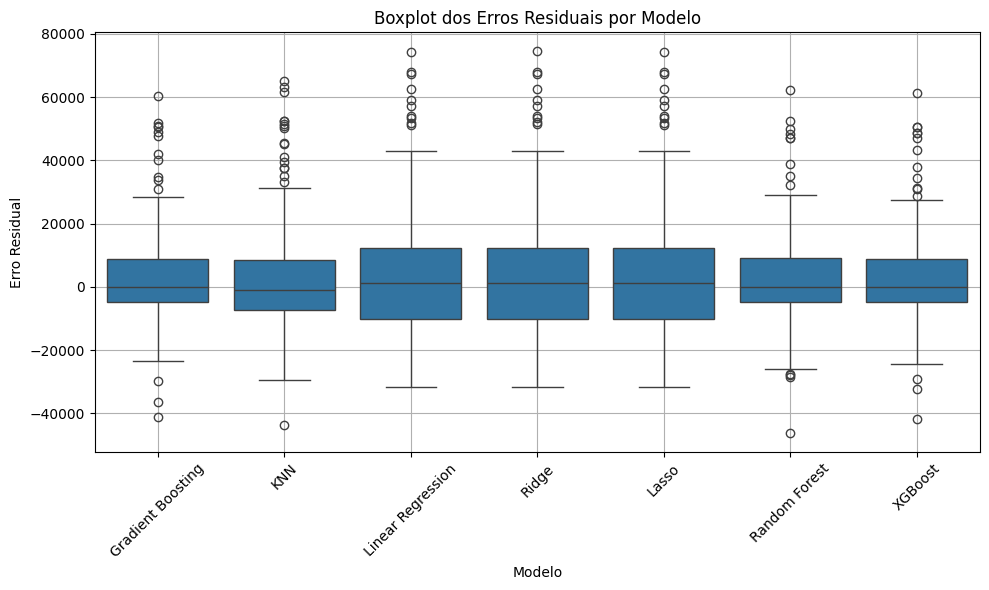

In [894]:
import pandas as pd

residuals_df = pd.DataFrame()
for name, model in models.items():
    y_pred = model.predict(x_test_escalonado)
    residuals = y_test - y_pred
    temp_df = pd.DataFrame({'Modelo': name, 'Erro Residual': residuals})
    residuals_df = pd.concat([residuals_df, temp_df])

plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df, x='Modelo', y='Erro Residual')
plt.title('Boxplot dos Erros Residuais por Modelo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Analisando o gráfico acima, notamos que os melhores modelos, mesmo apresentando ouliers, mantém a acurácia da previsão.

# **Conclusão**

Com base em todo o trabalho realizado, concluímos que o fator mais relevante para a determinação do custo do plano de saúde é o tabagismo. Fumantes tendem a pagar valores mais altos, independentemente da idade, do número de filhos ou do índice de massa corporal (IMC).

A base de dados utilizada mostrou-se coerente com a realidade da população, o que contribuiu para a obtenção de resultados consistentes nas previsões. Observamos também que, embora o gênero seja uma variável presente, o fato de a pessoa ser fumante teve um impacto significativamente maior no custo, tanto para homens quanto para mulheres.

Foram testados sete modelos de regressão, sendo que os algoritmos XGBoost e Gradient Boosting apresentaram os melhores desempenhos. Ambos alcançaram coeficientes de determinação (R²) superiores a 0,85, com baixos erros e alta precisão nas previsões. Curiosamente, os modelos baseados em árvores destacaram-se como os mais eficazes neste contexto.